# Data Exploration

This Jupyter Notebook explores the dataset, making it easier to decide on how to formulate the school location problem. 

In [ ]:
# Key Imports
import pandas as pd
import numpy as np
from haversine import haversine, haversine_vector, Unit # distance function
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

In [292]:
# read in the file and create key datasets for exploration/manipulation
df = pd.read_csv('data/clean_dataset_final.csv', converters={'point': pd.eval})
df['urban_rural'] = df['urban_rural'].map({1: 'rural', 2: 'urban'}) # change 1 to rural, 2 to urban.
df_middle = df.loc[df['grade_7_8'] > 0].reset_index(drop=True) # middle school dataset
df_lsec = df.loc[ (df['gr_offer'] == 'G. 9-10') | (df['gr_offer'] == 'G. 9-12')].reset_index(drop=True) # lower sec dataset

# Convert some datasets to numpy for quicker analysis using haversine.
df_m_enroll = df_middle['grade_7_8'].reset_index(drop=True).to_numpy(dtype=float) # Middle school enrollment
df_m_loc = df_middle['point'].reset_index(drop=True).to_numpy() # middle school GIS data
df_m_loc = np.array([np.array(i) for i in df_m_loc], dtype=float)

df_lsec_enroll = df_lsec['grade9_10'].reset_index(drop=True).to_numpy(dtype=float) # lower sec enrollment
df_lsec_loc = df_lsec['point'].reset_index(drop=True).to_numpy() # lower secondary school GIS data
df_lsec_loc = np.array([np.array(i) for i in df_lsec_loc], dtype=float)

current_ms_distance = df_middle['nearest_lwr_sec'].to_numpy() # existing MS distance to secondary school

In [294]:
# Describe or summarise the dataset. 
df.describe()

,lat,lon,grade1_4,grade5_8,grade_7_8,grade9_10,grade11_12,nearest_up_prim,nearest_lwr_sec,nearest_up_sec
count,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,26237.000000,5752.000000,18528.000000,1658.000000
mean,9.442966,38.447086,328.911499,203.181347,88.284636,55.637039,16.673210,2.299745,7.089897,7.540582
std,2.149995,1.724894,274.321277,249.752331,125.042696,277.889976,149.804521,2.088254,7.060226,9.077140
min,3.532050,34.235860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.944228,37.368600,147.000000,0.000000,0.000000,0.000000,0.000000,0.967956,2.616096,0.035976
50%,9.192933,38.490242,263.000000,144.000000,55.000000,0.000000,0.000000,2.088921,5.620346,4.041374
75%,10.958230,39.422092,439.000000,290.000000,126.000000,0.000000,0.000000,3.102896,9.406286,12.625387
max,14.721535,46.944100,3097.000000,4037.000000,2198.000000,3970.000000,4216.000000,34.847103,133.384496,72.433196


In [299]:
# Average enrollment of middle school
np.mean(df_middle['grade_7_8'])

143.36349569845888

In [300]:
# Average enrollment of lower secondary school
np.mean(df_lsec['grade9_10'])

880.4276236429433

In [301]:
# Total number of middle schools
len(df_middle)

16157

In [302]:
# Total number of lower secondary schools
len(df_lsec)

1658

In [303]:
# Middle School Enrollment
np.sum(df_middle['grade_7_8'])

2316324

In [304]:
# Lower Secondary Enrollment
np.sum(df_lsec['grade9_10'])

1459749

In [306]:
df_middle.describe()

,lat,lon,grade1_4,grade5_8,grade_7_8,grade9_10,grade11_12,nearest_up_prim,nearest_lwr_sec,nearest_up_sec
count,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.0,16157.0,0.0,16157.000000,0.0
mean,9.372276,38.409829,426.794393,319.320790,143.363496,0.0,0.0,NaN,6.875003,NaN
std,2.135607,1.693069,286.609447,255.562911,132.265832,0.0,0.0,NaN,6.881329,NaN
min,3.532267,34.235860,0.000000,6.000000,2.000000,0.0,0.0,NaN,0.000000,NaN
25%,7.797580,37.350200,228.000000,162.000000,65.000000,0.0,0.0,NaN,2.480981,NaN
50%,9.098686,38.437534,354.000000,249.000000,106.000000,0.0,0.0,NaN,5.531967,NaN
75%,10.858995,39.404552,547.000000,392.000000,175.000000,0.0,0.0,NaN,9.189900,NaN
max,14.721535,46.944100,3097.000000,4037.000000,2198.000000,0.0,0.0,NaN,133.384496,NaN


In [307]:
df_lsec.describe()

,lat,lon,grade1_4,grade5_8,grade_7_8,grade9_10,grade11_12,nearest_up_prim,nearest_lwr_sec,nearest_up_sec
count,1658.000000,1658.000000,1658.0,1658.0,1658.0,1658.000000,1658.000000,0.0,0.0,1658.000000
mean,9.278788,38.265042,0.0,0.0,0.0,880.427624,113.560917,NaN,NaN,7.540582
std,2.141998,1.748641,0.0,0.0,0.0,704.340870,340.146738,NaN,NaN,9.077140
min,3.532050,34.353640,0.0,0.0,0.0,27.000000,0.000000,NaN,NaN,0.000000
25%,7.758217,37.150785,0.0,0.0,0.0,358.000000,0.000000,NaN,NaN,0.035976
50%,9.037524,38.336086,0.0,0.0,0.0,647.000000,0.000000,NaN,NaN,4.041374
75%,10.614140,39.241275,0.0,0.0,0.0,1202.250000,0.000000,NaN,NaN,12.625387
max,14.629941,46.846100,0.0,0.0,0.0,3970.000000,3541.000000,NaN,NaN,72.433196


In [312]:
np.sum(current_ms_distance > 5)

8832

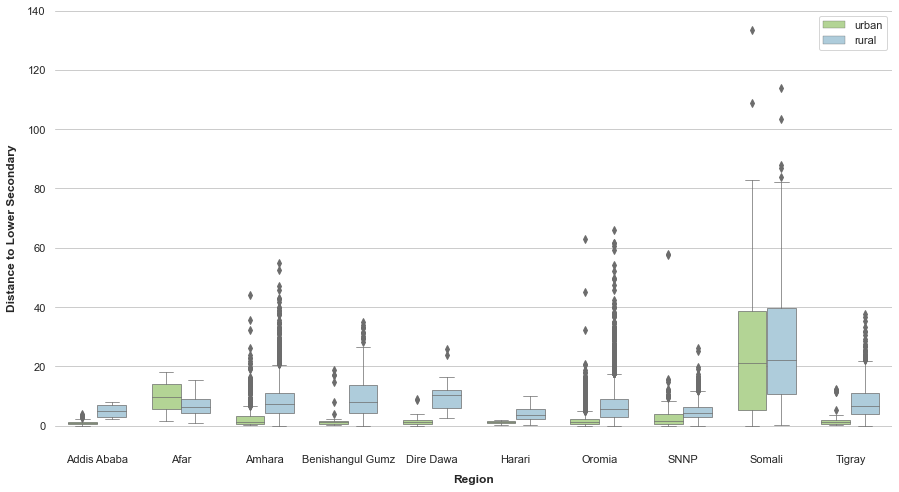

In [405]:
f, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 8)})
# Initialize the figure
sns.despine(top = True, right= True, left=True, bottom=True)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="ADM1_EN", y="nearest_lwr_sec", hue='urban_rural', width=0.7, linewidth=0.7, 
                 palette=['#b2df8a', '#a6cee3'],
                 data=df_middle.sort_values(by="ADM1_EN"))
ax.set_xlabel(xlabel='Region', fontdict={'weight': 'bold'}, labelpad=10)
ax.set_ylabel(ylabel='Distance to Lower Secondary', fontdict={'weight': 'bold'}, labelpad=10)
plt.legend(title='')
plt.show()

In [515]:
df_middle['nearest_lwr_sec']

0        13.340141
1        11.022295
2        16.076289
3        11.681930
4         9.170753
           ...    
16152    21.760155
16153     4.969135
16154     9.978022
16155     6.455908
16156    20.963629
Name: nearest_lwr_sec, Length: 16157, dtype: float64

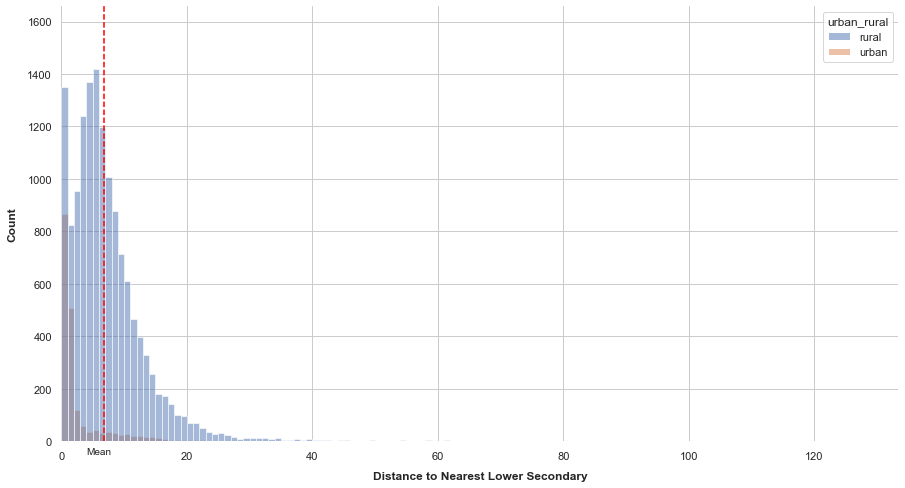

In [629]:
ax = plt.plot()
sns.set(rc={'figure.figsize':(10,8)})
# Initialize the figure
sns.despine(top = True, right= True, left=True, bottom=True)
sns.set_theme(style="whitegrid")
ax = sns.histplot(x='nearest_lwr_sec', hue='urban_rural', data=df_middle, binwidth=1, legend=True)
ax.set_xlabel(xlabel='Distance to Nearest Lower Secondary', fontdict={'weight': 'bold'}, labelpad=10)
ax.set_ylabel(ylabel='Count', fontdict={'weight': 'bold'}, labelpad=10)

ax.axvline(x=df_middle['nearest_lwr_sec'].mean(),
            color='red',
            ls='--', 
            lw=1.5)
ax.text(4,-50,'Mean', fontsize='small')
plt.xlim([0, (df_middle['nearest_lwr_sec'].max())])
plt.ylim([0, len(df_lsec['nearest_lwr_sec'])])
plt.show()

In [631]:
len(df_middle)

16157

In [284]:
# Number of lower secondary schools with less than 200 pupils
np.sum(df_lsec_enroll < 200, axis=0)

137

In [341]:
# Rural Average distance to secondary.
np.mean(df[df['urban_rural'] == 'rural']['nearest_lwr_sec'])

7.45805519169833

In [342]:
# Rural Average distance to primary.
np.mean(df[df['urban_rural'] == 'urban']['nearest_lwr_sec'])

4.151595359466796

In [364]:
# Check distance of MS to LS
dd = haversine_vector(df_m_loc,df_lsec_loc, Unit.KILOMETERS, comb=True)

In [380]:
# total MS-LS within less than 5km. 
np.sum(np.any((dd < 5), axis=1))

1601

In [393]:
# Observe these schools
df_lsec.iloc[np.where(np.any((dd < 5), axis=1) == False)]

,school_name,admin_code,geometry,lat,lon,ADM1_PCODE,ADM2_PCODE,ADM3_PCODE,ADM1_EN,ADM2_EN,...,grade_7_8,grade9_10,grade11_12,gr_offer,point,school_code,nearest_up_prim,nearest_sch_code,nearest_lwr_sec,nearest_up_sec
2,Worku Jember mtasebiya,S0302011083,POINT (38.1439 12.2218),12.221800,38.143900,ET03,ET0302,ET030201,Amhara,South Gondar,...,0,340,144,G. 9-12,"[12.2218, 38.1439]",S0302011083,NaN,S0302011083,NaN,0.000000
60,Yakelbahna,S0306062603,POINT (38.0664 10.6383),10.638300,38.066400,ET03,ET0306,ET030606,Amhara,East Gojam,...,0,413,0,G. 9-10,"[10.6383, 38.0664]",S0306062603,NaN,S0306050013,NaN,11.292139
159,Dhaas Sad. 2ffaa,S0404030323,POINT (38.7201 4.22106),4.221060,38.720100,ET04,ET0412,ET041220,Oromia,Borena,...,0,68,0,G. 9-10,"[4.22106, 38.7201]",S0404030323,NaN,S0404030313,NaN,25.362620
223,Oo'ituu Sad.2ffaa,S0412030983,POINT (38.757076 7.718748),7.718748,38.757076,ET04,ET0407,ET040708,Oromia,East Shewa,...,0,335,0,G. 9-10,"[7.718748, 38.757076]",S0412030983,NaN,S0412030973,NaN,11.079692
232,Ada'aa Sad 2ffaa,S0413080493,POINT (38.5928 10.0135),10.013500,38.592800,ET04,ET0406,ET040603,Oromia,North Shewa,...,0,108,0,G. 9-10,"[10.0135, 38.5928]",S0413080493,NaN,S0413080543,NaN,14.420501
233,Darroo Hamumaa Wajjuu,S0413080523,POINT (38.437 9.9247),9.924700,38.437000,ET04,ET0406,ET040603,Oromia,North Shewa,...,0,253,0,G. 9-10,"[9.9247, 38.437]",S0413080523,NaN,S0413080543,NaN,8.581675
258,Anger Meti,S0602010013,POINT (36.434128 9.390525),9.390525,36.434128,ET06,ET0604,ET060405,Benishangul Gumz,Kemashi,...,0,184,0,G. 9-10,"[9.390525, 36.434128]",S0602010013,NaN,S0416140473,NaN,23.420197
284,Meexxarrii,S0436060543,POINT (38.0112 5.81229),5.812290,38.011200,ET04,ET0415,ET041517,Oromia,West Guji,...,0,72,0,G. 9-10,"[5.81229, 38.0112]",S0436060543,NaN,S0723010013,NaN,9.886010
436,Emba Seneiti,S0102090353,POINT (39.26343 14.10493),14.104930,39.263430,ET01,ET0102,ET010203,Tigray,Central,...,0,1681,0,G. 9-10,"[14.10493, 39.26343]",S0102090353,NaN,S0104030303,NaN,20.188801
463,Mai-Gaba,S0106030713,POINT (37.69348 13.783761),13.783761,37.693480,ET01,ET0105,ET010502,Tigray,Western,...,0,1161,142,G. 9-12,"[13.783760999999998, 37.69348]",S0106030713,NaN,S0106030713,NaN,0.000000


In [392]:
df_lsec.iloc[223]

school_name                  Oo'ituu Sad.2ffaa
admin_code                         S0412030983
geometry            POINT (38.757076 7.718748)
lat                                    7.71875
lon                                    38.7571
ADM1_PCODE                                ET04
ADM2_PCODE                              ET0407
ADM3_PCODE                            ET040708
ADM1_EN                                 Oromia
ADM2_EN                             East Shewa
ADM3_EN              Adama Tulu Jido Kombolcha
urban_rural                              urban
grade1_4                                     0
grade5_8                                     0
grade_7_8                                    0
grade9_10                                  335
grade11_12                                   0
gr_offer                               G. 9-10
point                    [7.718748, 38.757076]
school_code                        S0412030983
nearest_up_prim                            NaN
nearest_sch_c

In [434]:
# Group by nearest school, and get mean distance to 
np.mean(df_middle.groupby(['nearest_sch_code'])['nearest_lwr_sec'].mean())

6.206170746444932

In [454]:
# Average distance by region of a MS to a LS.
# Group by region and closest school, return region and average distance to feeder schools by region.
avg_feeder = df_middle.groupby(['ADM1_EN', 'nearest_sch_code'])[['ADM1_EN','nearest_lwr_sec']].mean()
avg_feeder = avg_feeder.groupby('ADM1_EN')[['nearest_lwr_sec']].mean()
avg_feeder

,nearest_lwr_sec
ADM1_EN,
Addis Ababa,1.004485
Afar,5.293449
Amhara,7.057964
Benishangul Gumz,8.794051
Dire Dawa,9.154639
Harari,3.707941
Oromia,6.012055
SNNP,4.337755
Somali,24.588015


In [455]:
# Average no. of feeder MS per LS.
np.mean(avg_feeder)

nearest_lwr_sec    7.604569
dtype: float64

In [461]:
# Find the maximum radius per lower secondary school.
max_radius_feeder = df_middle.groupby(['ADM1_EN', 'nearest_sch_code'])[['nearest_lwr_sec']].max()
max_radius_feeder = max_radius_feeder.groupby('ADM1_EN')[['nearest_lwr_sec']].mean()
max_radius_feeder

,nearest_lwr_sec
ADM1_EN,
Addis Ababa,1.629217
Afar,7.307994
Amhara,13.341539
Benishangul Gumz,14.220392
Dire Dawa,12.892374
Harari,5.958855
Oromia,11.777449
SNNP,7.560312
Somali,43.753410


In [462]:
# Average catchment radius size.
np.mean(max_radius_feeder)

nearest_lwr_sec    13.014738
dtype: float64

In [658]:
# Check distance of MS to other MS
dms = haversine_vector(df_m_loc,df_m_loc, Unit.KILOMETERS, comb=True)

In [677]:
def remove_diagonals(xx):
    # Remove diagonals as it is the distance to itself. 
    # Source: https://pyquestions.com/deleting-diagonal-elements-of-a-numpy-array
    xx = xx[~np.eye(xx.shape[0], dtype=bool)].reshape(xx.shape[0],-1)
    return xx

In [682]:
# Average number of schools within a x-km radius of another school. 
within1 = np.sum(remove_diagonals(dms < 1), axis=1)
within2 = np.sum(remove_diagonals(dms < 2), axis=1)
within3 = np.sum(remove_diagonals(dms < 3), axis=1)
within4 = np.sum(remove_diagonals(dms < 4), axis=1)
within5 = np.sum(remove_diagonals(dms < 5), axis=1)
within6 = np.sum(remove_diagonals(dms < 6), axis=1)
within7 = np.sum(remove_diagonals(dms < 7), axis=1)
within8 = np.sum(remove_diagonals(dms < 8), axis=1)
within9 = np.sum(remove_diagonals(dms < 9), axis=1)
within10 = np.sum(remove_diagonals(dms < 10), axis=1)

In [687]:
within_dist = pd.DataFrame(list(zip(within1, within2, within3, within4, within5, within6, within7, within8, within9, within10)),
             columns= ['within1', 'within2', 'within3', 'within4', 'within5', 'within6', 'within7',
                                       'within8', 'within9', 'within10'])

In [700]:
within_dist.to_csv('dist.csv')

In [714]:
base = df_middle[df_middle['nearest_lwr_sec'] > 5]
len(base)

8832